Submission Deadline: __September 22, 2023; 11:59 PM__

A penalty will be applied for late submission. Please refer to the course policy for more detail.  

## Instructions

Please read the instructions carefully before you start working on the homework.

- Please follow instructions and printed out the results as required. Keep the printed results and your implementation for grading purpose.
    - The TAs will not run your code for grading purpose unless it is necessary. That means, you may lose some points if the printed results are not in the submitted file.
- Submission should be via Canvas.
    - If you use Google Colab for running the code, please download the file and submit it via Canvas once it's done.
    - Submission via a Google Colab link will be considered as an invalid submission.
- Please double check the submitted file once you upload it to Canvas.
    - Students should be responsible for checking whether they submit the right files.
    - Re-submission is not allowed once the deadline is passed.

Also, if you missed the class lectures, please study the course materials first before working on the homework. It may save you some time.

In [2]:
!pip install portalocker

# Task: Paraphrase Detection

Paraphrase detection is a text classification task, where the input is a pair of texts ($x_1, x_2$), and the output is the label $y$ of whether these two sentences are paraphrases ($y=1$) or not ($y=0$).

For example, given the following two sentences

- $x_1$: _The DVD-CCA then appealed to the state Supreme Court._
- $x_2$: _The DVD CCA appealed that decision to the U.S. Supreme Court._

the label $y$ should be $1$, as these two sentence are paraphrases.

In this homework, we will use paraphrase detection as an example task of text classification, and build both logistic regression and neural network classifiers for this task.


In this homework, we will use the Microsoft Research Paraphrase Corpus (MRPC) as the dataset for paraphrase detection. This is a dataset released

# 1 Logistic Regression (4 points)

You can refer to the demo code that we used in our class lecture as an example for your implementation. Please pay attention to the difference of the data format and the specific requirements, to make sure your implementation is correct.


Although there are different ways to download the MRPC dataset, we will use the one from `torchtext` to keep the consistency with the next section.

In [3]:
from torchtext.datasets import MRPC
from torchtext.data.functional import to_map_style_dataset

trn_iter = MRPC(split='train')
dev_iter = MRPC(split='test')

# Convert iterable-style dataset to map-style dataset
def collect_examples(dat_iter):
    label_list, text_list = [], []
    for label, text1, text2 in dat_iter:
        label_list.append(label)
        text_list.append(f"{text1} {text2}")
    return label_list, text_list

trn_labels, trn_texts = collect_examples(trn_iter)
dev_labels, dev_texts = collect_examples(dev_iter)

## 1.2 Data Processing (2 points)

**TODO**: use the following code block to implement the steps for data processing. You can use the functions from [Sklearn](https://scikit-learn.org/stable/).

- Create the vocab by
    - filtering out the tokens with their frequencies less than 3
    - converting all words to lower cases
- Convert both `trn_texts` and `dev_texts` to data matrices using the constructed vocab
- Report
    - the number of words in the vocab
    - the dimensions of the two data metrices constructed in the previous steps

Please keep the reported the numbers in the file for grading purpose, and add necessary description of the printed results, so we can tell which one is which.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# ========================================
# TODO:
#   Filter out tokens with count < 3
#   All words should be lower case
#   both trn_texts and dev_texts should be data matrices
# Report:
#   Total number of words in vocab
#   Dimensions of the two matrices from the prior steps

vectorizer = CountVectorizer(lowercase=True, min_df=3)
trn_data_matrix = vectorizer.fit_transform(trn_texts)
dev_data_matrix = vectorizer.transform(dev_texts)

vocab = vectorizer.vocabulary_
print("Vocab size = {}".format(len(vocab)))
print("Size of training data = {}".format(trn_data_matrix.shape))
print("Size of testing data = {}".format(dev_data_matrix.shape))

Vocab size = 4542
Size of training data = (4076, 4542)
Size of testing data = (1725, 4542)


## 1.3 Logistic Regression Classifier

### 1.3.1 LR without regularization (1 point)

**TODO**: Please implement a logistic regression classifier for the paraphrase detection task. You can use the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier from Sklearn.


Please implement the logistic regression classifier with the following requirements

- include the bias term in the classifier
- turn off the regularization term (approximately)
- use the `liblinear` optimization algorithm (we don't talk about the detail of this algorithm in class, but it converges better when training with the MRPC dataset)

Please report

- the classification accuracies on both training and validation sets

In [5]:
from sklearn.linear_model import LogisticRegression

# =============================
# TODO:
#   Implement a LR classifier with:
#     a bias term
#     no regularization
#       because C is the inverse of the regularization term we want to set C really high
#       that way the regularization term is almost 0
#
#       On second thought this might be achieved by setting penalty to none instead?
#       I'll check both
#       Not possible, just have to set C really high
#       The model tweaks when it has to use the liblinear solver with penalty=None
#     use liblinear optimization algorithm

classifier01 = LogisticRegression(fit_intercept=True, C=10e10, solver='liblinear')
classifier01.fit(trn_data_matrix, trn_labels)

#   report:
#     classification accuracies on both training and validation sets
print("Results for classifier with C=10^10")
print("Training accuracy = {}".format(classifier01.score(trn_data_matrix, trn_labels)))
print("Validation accuracy = {}".format(classifier01.score(dev_data_matrix, dev_labels)))

Results for classifier with C=10^10
Training accuracy = 0.9995093228655545
Validation accuracy = 0.6220289855072464


### 1.3.2 LR with regularization (1 point)

**TODO**: Please implement the LR classifier with the following requirements

- include the bias term in the classifier
- include the $\ell_2$ regularization with $\lambda = 10.0$
- use the `liblinear` solver

Please report

- the classification accuracies on both training and validation sets

In [6]:
from sklearn.linear_model import LogisticRegression

# =============================
# TODO:
#   Implement a LR classifier with:
#     a bias term in the classifier
#     l2 reg with lambda = 10.0
#       Becuase C is the equal to 1/lambda, C should be equal to 0.1
#     liblinear solver
classifier02 = LogisticRegression(penalty="l2", fit_intercept=True, C=0.1, solver='liblinear')
classifier02.fit(trn_data_matrix, trn_labels)

#   Report:
#     classification accuracies of both training and validation sets
print("Results for classifier with C=0.1, liblinear solver, l2 regularization")
print("Training accuracy = {}".format(classifier02.score(trn_data_matrix, trn_labels)))
print("Validation accuracy = {}".format(classifier02.score(dev_data_matrix, dev_labels)))

Results for classifier with C=0.1, liblinear solver, l2 regularization
Training accuracy = 0.8626104023552502
Validation accuracy = 0.6765217391304348


# 2 Neural Classifiers (11 points)

The following code was adopted from the [demo code]() that we used for our class lectures. Please read the instructions carefully (especially, the **TODO** part in each section), to make sure your implementation is correct.

In [7]:
# Necessary packages

import sys, os, random, math, sys
import torch, spacy
import numpy as np
from torch import nn
from tqdm.notebook import trange, tqdm

from matplotlib import pyplot as plt

from torch import optim
from torch.autograd import Variable
from torch.nn.utils import clip_grad_norm_ as clip_grad_norm
from torch.nn import functional as F


## Random seeds, to make the results reproducible
seed = 2
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## 2.1 Data

### 2.1.1 Load Data (2 points)

Note that

- the `basic_english` tokenizer called by the `get_tokenizer` function will first normalize the text then tokenize it using white spaces. This is definitely not the optimal tokenizer, and you can find other options [here](https://pytorch.org/text/stable/data_utils.html#torchtext.data.utils.get_tokenizer). For this homework, we will use this simple tokenizer.

**TODO**

- Load the dataset `MRPC`
- Construct the `vocab` based on the training set with the following requirements
    - Filter out the tokens with the frequency less than 3
    - Add two special tokens: `<unk>` and `<pad>`
    - Set the default word index as the index of the `<unk>` token

Please report
- Print out the size of the `vocab`

Keep the reported results for grading.

In [8]:
from torchtext.datasets import MRPC
from torchtext.utils import download_from_url
from torchtext.data.utils import get_tokenizer, ngrams_iterator
from torchtext.vocab import build_vocab_from_iterator

ngrams = 1

tokenizer = get_tokenizer("basic_english")

vocab = None

# =============================
# TODO:
#   Load dataset MRPC
#   Construct vocab with
#     no tokens with frequency less than 3
#     Two special tokens:
#       <unk>
#       <pad>
#     Set default word index as the index of <unk> token
#   Report:
#     Print out size of the vocab

def yield_tokens(data_iter, ngrams):
  for label, text1, text2 in data_iter:
    # print("This is paraphrased: {}".format(label))
    # print(text1)
    # print(text2)

    # I think we need to do it like this because in the prior example, we combine the first and second sentences
    # but here we have each sentence separately
    # but I find a greater number of words here. How come?
    # yield ngrams_iterator(tokenizer(text1), ngrams)
    # print("single")
    # print(tokenizer(text1))
    # print("combo")
    # print(tokenizer(text1) + tokenizer(text2))
    yield ngrams_iterator(tokenizer(text1) + tokenizer(text2), ngrams)

trn_text_iter02 = MRPC(split='train')
tst_text_iter02 = MRPC(split='test')

vocab = build_vocab_from_iterator(yield_tokens(trn_text_iter02, ngrams), min_freq=3, specials=["<unk>", "<pad>"])
vocab.set_default_index(vocab["<unk>"])

print("Number of words in the vocab: {}".format(len(vocab)))

Number of words in the vocab: 6229



### 2.1.2 Data Preprocessing Functions (2 points)

The following code block does two things

- create mini-batches
- convert texts into numeric vectors (tensors)

**TODO**

- For each mini batch, set its own cutoff length
    - By default, set the cutoff length to be the longest text in that minibatch
    - If the length is larger than 50, set it to be 50

In [9]:
cutoff_threshold = 50

def text_pipeline(x):
    """ Read the tokens from text x and return the list of word indices
    """
    return vocab(list(ngrams_iterator(tokenizer(x), ngrams)))

def collate_batch(batch):
    """ Construct the text/label tensors based on a mini-batch of texts and their labels
    """
    label_tensor, text_tensor = None, None
    # =============================
    # TODO:
    #   For each mini batch, set cutoff length
    #   Set cutoff to be longest text in minbatch
    #    if longer than 50, set to 50

    max_length = 50
    longest_text_length = 0

    label_list, text_list = [], []

    # we can't do this quite the way the prof has it
    # instead we need to set the max_length equal to the min of the real cutoff length
    # or the longest text in the batch
    # so lets process everything and store them in an intermediary ds
    # compute the longest length
    # and then apply the below value
    # print(batch)
    for (_label, _text1, _text2) in batch:
      processed_text1 = text_pipeline(_text1)
      processed_text2 = text_pipeline(_text2)
      longest_text_length = max(longest_text_length, len(processed_text1) + len(processed_text2))


    for (_label, _text1, _text2) in batch:
      label_list.append(_label)
      processed_text = text_pipeline(_text1)
      processed_text += text_pipeline(_text2)

      if len(processed_text) < min(max_length, longest_text_length):
        processed_text += [vocab["<pad>"]]*(min(max_length, longest_text_length)-len(processed_text))
      elif len(processed_text) > min(max_length, longest_text_length):
        processed_text = processed_text[:min(max_length, longest_text_length)]

      text_list.append(torch.tensor(processed_text))

    label_tensor = torch.tensor(label_list, dtype=torch.int64)

    text_tensor = torch.stack(tuple(text_list))

    # Do I need this line?
    text_tensor = torch.transpose(text_tensor, 0, 1)

    return label_tensor, text_tensor

### 2.1.3 Data Processing (1 point)


Call the functions defined in the previous code block to process both the `training` and `dev` sets

**TODO**

- Load the training and test sets
- Construct mini-batches for training and evaluation with mini-batch size as 32

In [10]:
from torchtext.data.functional import to_map_style_dataset
from torch.utils.data import DataLoader

# Mini-batch size
batch_size = 32

# Read the data again
trn_iter = MRPC(split='train')
dev_iter = MRPC(split='test')

trn_dataloader, dev_dataloader = None, None

# =============================
# TODO:
#   Load training/test sets
#   Construct mini-batches with size 32

trn_dataset = to_map_style_dataset(trn_text_iter02)
tst_dataset = to_map_style_dataset(tst_text_iter02)

trn_dataloader = DataLoader(trn_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)
dev_dataloader = DataLoader(tst_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)

## 2.2 A Simple Feed-forward Neural Network Classifier

The goal of this section is to demonstrate

- how to define a simple neural text classifier
- how to train the neural network model with the BP algorithm

### 2.2.1 Define Neural Network Models (2 points)

This section defines a basic neural network model (as illustrated in the following figure) for text classification.

**TODO**

Please follow the specification to implement the neural network model. Compared to the single layer neural network model, the following neural network will add another hidden layer, which is a fully-connected neural network.

1. From input layer to the first hidden layer: for a given text $x$

$$h^{(1)} = \sigma (x_1 + x_2 + \cdots + x_N)$$

where $\{w_1, x_2, \cdots, w_N\}$ is the corresponding word embeddings in the text $x$. This is a mathematical formulation. In the actual implementation, it also involves adding the embeddings of some padding tokens.

2. From the first hidden layer to the second hidden layer

$$h^{(2)} = \sigma (W^{(2)}\cdot h^{(1)})$$

where $W^{(2)}$ is the learnable parameter for the second layer.

3. From the second hidden layer to the classification layer

$$p(y) =\text{Softmax}(W^{(o)} h^{(2)}) $$

where $W^{(o)}$ is the learnable parameter for the classification layer.

In [11]:
class NeuralClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, class_size=2):
        super(NeuralClassifier, self).__init__()
        """ Initialization
        - vocab_size
        - embed_size: word embedding size
        - drop_rate: dropout rate
        - class_size: number of classes. For binary classification, class_size = 2
        """
        # ---------------------------------
        # Configuration
        self.vocab_size = vocab_size # size of the vocab
        self.class_size = class_size # number of classes

        # ==================================
        # TODO:
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.fc1 = nn.Linear(embed_size, hidden_size, bias=True)
        self.fc2 = nn.Linear(hidden_size, class_size, bias=True)
        # END of TODO
        # ==================================


    def forward(self, batch):
        """ Forward function
        """
        label, text = batch

        # =================================
        # TODO:
        # Hidden Layer 1
        embedded = self.embed(text)
        hidden01 = torch.sigmoid(embedded.sum(axis=0))
        hidden02 = torch.sigmoid(self.fc1(hidden01))
        logit = self.fc2(hidden02)
        # Hidden Layer 2
        logprob = F.log_softmax(logit, dim=1)

        # END of TODO
        # ==================================
        loss = F.cross_entropy(logprob, label)
        return loss, logprob


## 2.3 Neural Network Training

### 2.3.1 Additional functions for mini-batch training and evaluation

Define the training function with a mini-batch


In [12]:
def batch_train(batch, model, optimizer):
    """ Training with one batch
    - batch: a min-batch of the data
    - model: the defined neural network
    - optimizer: optimization method used to update the parameters
    """
    # set in training mode
    model.train()
    # initialize optimizer
    optimizer.zero_grad()
    # forward: prediction
    loss, _ = model(batch)
    # backward: gradient computation
    loss.backward()
    # norm clipping, in case the gradient norm is too large
    clip_grad_norm(model.parameters(), 1.0)
    # gradient-based update parameter
    optimizer.step()
    return model, loss.item()

Define the evaluation function

In [13]:
def eval(data_iter, model):
    """ Evaluate the model with the data
    data_iter: the data iterator
    model: the defined model
    """
    # set in the eval model, which will trun off the features only used for training, such as droput
    model.eval()
    # records
    val_loss, val_batch = 0, 0
    total_example, correct_pred = 0, 0
    # iterate all the mini batches for evaluation
    for b, batch in enumerate(data_iter):
        # Forward: prediction
        label, _ = batch
        loss, logprob = model(batch)
        #
        val_batch += 1
        val_loss += loss
        # Argmax
        max_logprob, pred_label = torch.max(logprob, -1)
        correct_pred += (pred_label==label).sum()
        total_example += label.size()[0]
    acc = (1.0*correct_pred)/total_example
    return (val_loss/val_batch).item(), acc

### 2.3.2 Main function for training (2 points)

**TODO**

In the following code, please implement the main function for training and validation with the requirements

- Size of the neural network classifier
    - embedding size: 16
    - hidden size: 32
- Optimizer
    - use the SGD optimizer
    - learning rate: 0.05
    - weight decay coefficient: 0.0
- Training epochs: 60
- Validation:
    - Run validation after every 100 steps
    - Record the validation loss `ValLoss` and validation accuracy `ValAcc`
    - Record the average training loss `TrnLoss` across all the training steps so far


Please report

- the best prediction accuracy on the validation set
- the prediction accuracy with the model at the end of the training

Please keep the reported numbers for grading purpose.

Note that, the best prediction accuracy should be higher than 68%

In [14]:
# -----------------------------------
vocab_size = len(vocab)
torch.manual_seed(seed)
TrnLoss, ValLoss, ValAcc = [], [], []

# =====================================
# TODO:
#   embedding size: 16
#   hidden size: 32
model = NeuralClassifier(vocab_size, embed_size=16, hidden_size=32)
# optimizer
#   SGD optimizer
#     0.05 learning rate
#     0.0 weight decay coeff
optimizer = optim.SGD(model.parameters(), lr=0.05, weight_decay=0)
# training epochs: 60
epoch = 60
# Validation
#   every 100 steps
#   Validation loss as ValLoss nad validation accuracy ValAcc
#   Average training loss TrnLoss across all training steps
val_step = 100

total_batch = 0
total_loss = 0.0
for e in trange(epoch):
  # print("e:")
  # print(e)
  for b, batch in enumerate(trn_dataloader):
    # print(b)
    # print(batch)
    total_batch += 1

    model, loss = batch_train(batch, model, optimizer)
    total_loss += loss

    if total_batch % val_step == 0:
      val_loss, val_acc = eval(dev_dataloader, model)
      ValLoss.append(val_loss)
      ValAcc.append(val_acc)
      TrnLoss.append(total_loss/total_batch)

# Report
#   Best prediction accuracy on validaiton set
#   Prediction accuracy at end of training
print("The best validation accuracy = {}".format(max(ValAcc)))
print("Final prediction accuracy = {}".format(ValAcc[-1]))

  0%|          | 0/60 [00:00<?, ?it/s]

The best validation accuracy = 0.6788405776023865
Final prediction accuracy = 0.6759420037269592


### 2.3.3 Training analysis (2 points)

Run the following code block to visualize the training and validation losses. Based on the loss curves, answer the following question.

- Is the model sufficient trained?
- What is the your evidence to the first question?

Please use the text block under the figure to fill in your answer

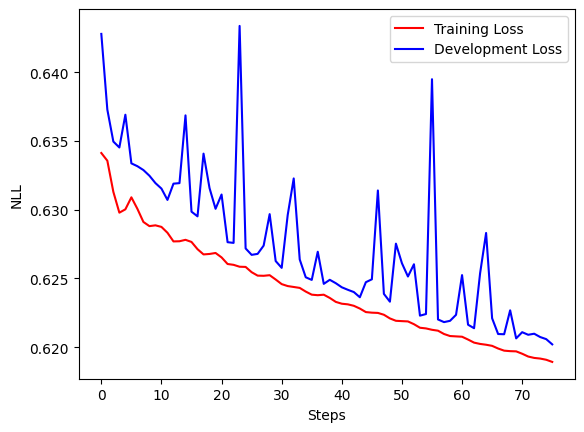

In [15]:
plt.plot(range(len(TrnLoss)), TrnLoss, color="red", label="Training Loss") # Training loss
plt.plot(range(len(ValLoss)), ValLoss, color="blue", label="Development Loss") # Val loss
plt.xlabel("Steps")
plt.ylabel("NLL")
plt.legend()

**Is the model sufficiently trained?**

By viewing the graph, we can see tha the model is not sufficiently trained. We can come to this conclusion based off two aspects of the graph. First we can see that the training and validation/development loss lines still have a downward slope, they still have not plateaued. This indicates that further training can improve the model's performance.

Additionally, we do not see a significant spike in the validation/development loss. This indicates that the model is still able to generalize well and hasn't overfit to the training data. While typically one does not train a model to the point of overfitting, the lack of overfitting is a direct indicator that further training can still be beneficial.

TLDR: model is not sufficiently trained because loss curves have not yet plateaued.

## 2.4 Further Improvement (2 points)

There are several hyper-parameters that we can tune to get better results. Here are five of them

- Number of epochs
- Learning rate
- Size of word embeddings
- Size of hidden dimensions
- Weight decay

Based on your implementation in section 2.2.2, feel free to modify any hyper-parameters and try to get a better prediction accuracy on the validation set. The result should be at least 0.5% better than the best prediction accuracy on the validation set reported in section 2.2.2.

Please report

- the best prediction accuracy on the validation set and
- the specific values of the hyper-parameters used to produce the best result

Keep the numbers in the file for grading.

In [16]:
vocab_size = len(vocab)
torch.manual_seed(seed)
TrnLoss, ValLoss, ValAcc = [], [], []

# Hyper parameters
epoch = 1000
lr = 0.05
embed_size = 16
hidden_size = 32
weight_decay = 0.001

# ======================================
# TODO: add your implementation here and run it
model = NeuralClassifier(vocab_size, embed_size=embed_size, hidden_size=hidden_size)
optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)
val_step = 100

total_batch = 0
total_loss = 0.0
for e in trange(epoch):
  # print("e:")
  # print(e)
  for b, batch in enumerate(trn_dataloader):
    # print(b)
    # print(batch)
    total_batch += 1

    model, loss = batch_train(batch, model, optimizer)
    total_loss += loss

    if total_batch % val_step == 0:
      val_loss, val_acc = eval(dev_dataloader, model)
      ValLoss.append(val_loss)
      ValAcc.append(val_acc)
      TrnLoss.append(total_loss/total_batch)

# Report
#   Best prediction accuracy on validaiton set
#   Prediction accuracy at end of training
print("The best validation accuracy = {}".format(max(ValAcc)))
print("Final prediction accuracy = {}".format(ValAcc[-1]))
print("Number of epochs = {}".format(epoch))
print("Learning Rate = {}".format(lr))
print("Size of word embeddings = {}".format(embed_size))
print("Size of hidden dimensions = {}".format(hidden_size))
print("Weight decay = {}".format(weight_decay))

  0%|          | 0/1000 [00:00<?, ?it/s]

The best validation accuracy = 0.6898550987243652
Final prediction accuracy = 0.6486956477165222
Number of epochs = 1000
Learning Rate = 0.05
Size of word embeddings = 16
Size of hidden dimensions = 32
Weight decay = 0.001


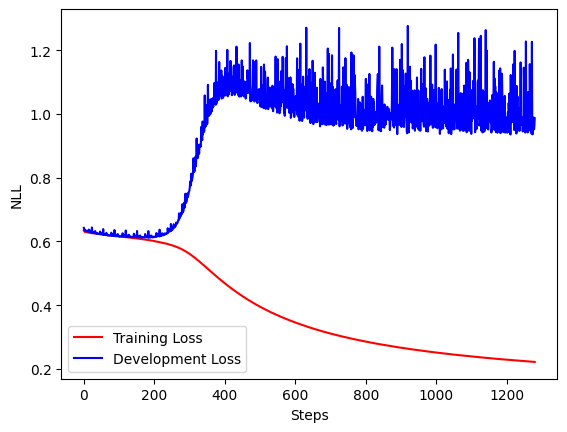

In [17]:
plt.plot(range(len(TrnLoss)), TrnLoss, color="red", label="Training Loss") # Training loss
plt.plot(range(len(ValLoss)), ValLoss, color="blue", label="Development Loss") # Val loss
plt.xlabel("Steps")
plt.ylabel("NLL")
plt.legend()

**End of the homework 01**

---